In [2]:
import pandas as pd
import numpy as np

path = '/media/jdcloud/'

labels_en = pd.read_csv(path + "kfold_labels_en.csv")
print(labels_en.shape)
print(labels_en.head())

data_info = pd.read_csv(path + "data_info.csv")
print(data_info.head())

(7703, 13)
   File_name  age  dataSize  label1  label2  label3  label4  label5  label6  \
0  TRAIN0001   63      5000     8.0     NaN     NaN     NaN     NaN     NaN   
1  TRAIN0002   51      5000     8.0     NaN     NaN     NaN     NaN     NaN   
2  TRAIN0003   85      5000     8.0     NaN     NaN     NaN     NaN     NaN   
3  TRAIN0004   69      5000     8.0     NaN     NaN     NaN     NaN     NaN   
4  TRAIN0005   76      5000     8.0     NaN     NaN     NaN     NaN     NaN   

   label7  label8  labels_num     sex  
0     NaN     NaN           1  FEMALE  
1     NaN     NaN           1    MALE  
2     NaN     NaN           1    MALE  
3     NaN     NaN           1  FEMALE  
4     NaN     NaN           1  FEMALE  
   File_name  label1  label2  label3  label4  label5  label6  label7  label8  \
0  TRAIN0001       8     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  TRAIN0002       8     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2  TRAIN0003       8     NaN     N

In [3]:
data_info[(data_info.label3==8)  &  (data_info.labels_num == 4)][:]# & (data_info.label2==5)

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize


In [4]:
data_info[(data_info.label1==7) & (data_info.labels_num>1)]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
1427,TRAIN1428,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,58,5000
1459,TRAIN1460,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,62,5000
1505,TRAIN1506,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,47,5000
3053,TRAIN3054,7,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,50,9500
3155,TRAIN3156,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,73,7500
3171,TRAIN3172,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,63,8000
3526,TRAIN3527,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,22,9500
3570,TRAIN3571,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,33,7500
4802,TRAIN4803,7,4.0,2.0,NaN,NaN,NaN,NaN,NaN,3,MALE,27,5000
5010,TRAIN5011,7,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE,64,5000


In [5]:
def read_data_labels_info(data_path, labels,split = "TrainingSet",preprocess=True):
    """ Read data """

    # Paths
    path_signals = os.path.join(data_path, split)

    # Read labels and one-hot encode
    #labels = pd.read_csv("reference.csv")
    # 8    7   6   5   4   3   2   1   0
    #2156+224+672+654+180+826+534+504+1953
    
    # Read time-series data
    channel_files = os.listdir(path_signals)
    channel_files.sort()
    n_channels = 12#len(channel_files)

    # Initiate array
    list_of_channels = []
    i_ch = 0
    
    data_x = []
    data_y = []
    
    channel_name = ['V6', 'aVF', 'I', 'V4', 'V2', 'aVL', 'V1','II', 'aVR', 'V3', 'III', 'V5']
    channel_mid_name = ['II','aVR','V2','V5']
    channel_post_name = ['III','aVF','V3','V6']
      
    info = []
    
    for i_ch,fil_ch in tqdm(enumerate(channel_files[:])):#tqdm

        labels_list = list(labels.iloc[i_ch].values[:])#.dropna()
        #print(labels_list)

        ecg = sio.loadmat(os.path.join(path_signals,fil_ch))
        a = 0
        for m in labels_list:
            if m in [0,1,2,3,4,5,6,7,8]:
                a += 1
        labels_list.append(a)
        labels_list.append(ecg["ECG"][0][0][0][0])
        labels_list.append(ecg["ECG"][0][0][1][0][0])
        labels_list.append(ecg["ECG"][0][0][2].shape[1])
        
        
        info.append(labels_list)
    column_name = ['File_name','label1','label2','label3','label4','label5','label6',
                   'label7','label8','labels_num','sex','age','dataSize']
    info_pd =pd.DataFrame(columns=column_name,index=range(len(channel_files)),data=info)
    # Return 
    return info_pd

In [6]:
augment_path = "./CPSC_Train/"
labels_aug = pd.read_csv(augment_path + "REFERENCE.csv")
labels_aug.columns = ['File_name', 'label1', 'label2','label3']
#, 'label4', 'label5', 'label6', 'label7', 'label8']
labels_aug["label4"] = np.nan
labels_aug["label5"] = np.nan
labels_aug["label6"] = np.nan
labels_aug["label7"] = np.nan
labels_aug["label8"] = np.nan

In [7]:
labels_aug["label1"] = labels_aug["label1"].map(lambda x :x-1.) 
labels_aug["label2"] = labels_aug["label2"].map(lambda x :x-1.) 
labels_aug["label3"] = labels_aug["label3"].map(lambda x :x-1.) 

In [8]:
labels_aug.replace(5.,"wu",inplace=True)
labels_aug.replace(6.,"liu",inplace=True)

In [9]:
labels_aug.replace("wu",6.,inplace=True)
labels_aug.replace("liu",5.,inplace=True)

In [10]:
labels_aug.iloc[952]

File_name    A0953
label1           6
label2           6
label3         NaN
label4         NaN
label5         NaN
label6         NaN
label7         NaN
label8         NaN
Name: 952, dtype: object

In [11]:
labels_aug[labels_aug["label1"]==2].head()

,File_name,label1,label2,label3,label4,label5,label6,label7,label8
38,A0039,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,A0042,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,A0070,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,A0102,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,A0104,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import scipy.io as sio
import os
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import wfdb.processing as wp
warnings.filterwarnings('ignore')

In [89]:
augment_data_path = augment_path+"TrainingSet/"
record = "A6873"
ecg = sio.loadmat(augment_data_path+record+".mat")

In [90]:
ecg["ECG"][0][0][2][0].shape

(7000,)

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


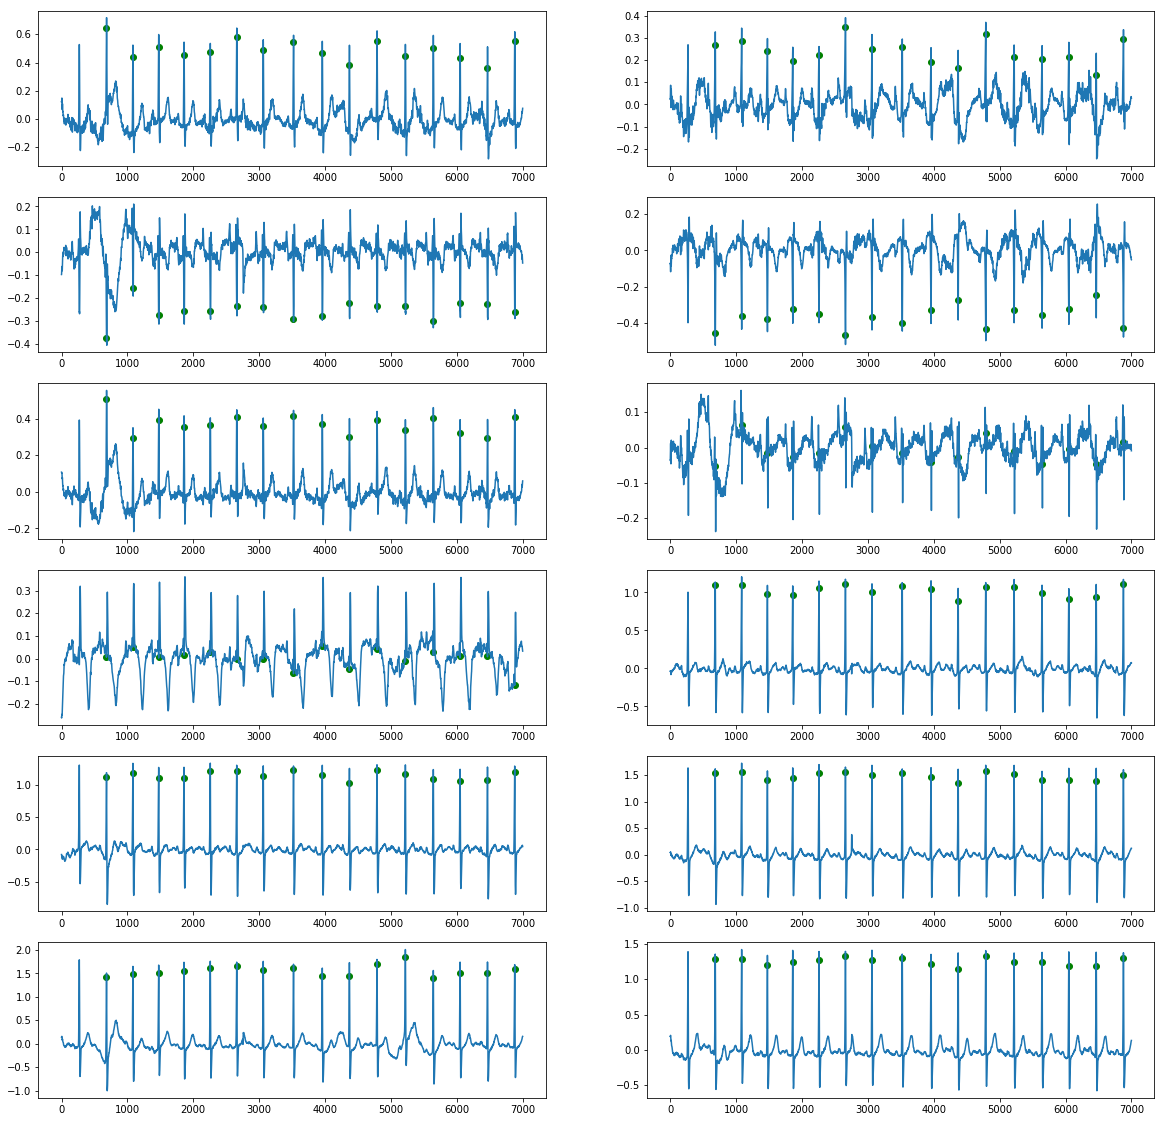

In [91]:
plt.figure(figsize=(20,20))
ecg_data = ecg["ECG"][0][0][2][1]#ecg["data"][2]
hard_peaks, soft_peaks = wp.find_peaks(ecg_data)
qrs_inds = wp.xqrs_detect(ecg_data, 500)#[:10]
for i in range(12):
    plt.subplot(6, 2, i+1)
    ecg_data = ecg["ECG"][0][0][2][i]#[:5000]#ecg["data"][i]
    #hard_peaks, soft_peaks = wp.find_peaks(ecg_data)
    #qrs_inds = wp.xqrs_detect(ecg_data, 500)
    # # print hard_peaks
    #plt.figure(figsize=(18,8))
    plt.plot(ecg_data)
    #plt.scatter(hard_peaks, ecg_data[hard_peaks], marker='o', c='r')
    plt.scatter(qrs_inds, ecg_data[qrs_inds], marker='o', c='g')
#plt.plot(soft_peaks)
#print("labels : ",labels[labels[0] == record][1].values)
plt.show()

In [13]:
labels_aug_info = read_data_labels_info(augment_path,labels_aug)

6877it [00:39, 173.66it/s]


In [14]:
labels_aug_info["dataSize"].max()

72000

In [15]:
labels_aug_info["dataSize"].min()

3000

In [94]:
labels_aug_info[labels_aug_info["dataSize"]==3000]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
5276,A5277,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,29.0,3000


In [95]:
labels_aug_info[labels_aug_info["dataSize"]==72000]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
4132,A4133,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,84.0,72000


In [96]:
labels_aug_info[labels_aug_info["dataSize"]<4500]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
2662,A2663,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,76.0,4000
5276,A5277,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,29.0,3000


In [16]:
labels_aug_info[labels_aug_info["dataSize"]>45000]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
648,A0649,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Female,76.0,59000
1579,A1580,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,64.0,66000
2798,A2799,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,83.0,47500
3496,A3497,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,82.0,48500
4003,A4004,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,86.0,56000
4079,A4080,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Female,76.0,59000
4132,A4133,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,84.0,72000
4786,A4787,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,58.0,69000
4840,A4841,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male,73.0,49000
6229,A6230,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female,95.0,50500


In [22]:
labels_aug_info["label1"].value_counts()

4.0    1695
1.0    1098
0.0     918
7.0     826
2.0     704
5.0     653
6.0     574
3.0     207
8.0     202
Name: label1, dtype: int64

In [23]:
labels_aug_info["label2"].value_counts()

4.0    162
1.0    123
5.0     47
6.0     42
7.0     41
3.0     28
2.0     18
8.0     16
Name: label2, dtype: int64

In [24]:
labels_aug_info["label3"].value_counts()

7.0    2
8.0    2
3.0    1
6.0    1
Name: label3, dtype: int64

In [101]:
labels_aug_info[labels_aug_info["labels_num"]==3]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
1235,A1236,9,5.0,6.0,NaN,NaN,NaN,NaN,NaN,3,Male,61.0,12452
1665,A1666,5,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3,Male,61.0,12452
3594,A3595,6,5.0,9.0,NaN,NaN,NaN,NaN,NaN,3,Male,61.0,12452
3836,A3837,8,2.0,4.0,NaN,NaN,NaN,NaN,NaN,3,Female,52.0,8500
4989,A4990,2,4.0,8.0,NaN,NaN,NaN,NaN,NaN,3,Female,52.0,8500
6806,A6807,4,2.0,8.0,NaN,NaN,NaN,NaN,NaN,3,Female,52.0,8500


In [18]:
labels_aug[labels_aug["label3"]>0]

,File_name,label1,label2,label3,label4,label5,label6,label7,label8
1235,A1236,8.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
1665,A1666,4.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
3594,A3595,6.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN
3836,A3837,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
4989,A4990,1.0,3.0,7.0,NaN,NaN,NaN,NaN,NaN
6806,A6807,3.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN


In [19]:
labels_aug_info[(labels_aug_info["label1"]==2) & (labels_aug_info["labels_num"]==1)].shape

(686, 13)

In [20]:
labels_aug_info[(labels_aug_info["label1"]==3) & (labels_aug_info["labels_num"]==1)].shape

(179, 13)

In [26]:
labels_aug_info[(labels_aug_info["label1"]==6) & (labels_aug_info["labels_num"]==2)].head()

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex,age,dataSize
223,A0224,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,92.0,8000
236,A0237,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Female,22.0,7722
250,A0251,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,73.0,5000
352,A0353,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Male,71.0,10000
384,A0385,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Female,85.0,5000


In [106]:
labels_aug_info[(labels_aug_info["label1"]==7) & (labels_aug_info["labels_num"]==1)].shape

(607, 13)

In [110]:
labels_aug_info[(labels_aug_info["label1"]==7) & (labels_aug_info["labels_num"]==2)].shape

(46, 13)

In [109]:
labels_aug[(labels_aug["label1"]==7)].shape

(653, 9)

In [107]:
labels_aug_info[labels_aug_info["label1"]==1].shape

(918, 13)

In [108]:
labels_aug[labels_aug["label1"]==1].shape

(918, 9)

In [27]:
label2_list = labels_aug[labels_aug_info.labels_num==2].index.tolist()

In [30]:
pd2 = labels_aug_info.loc[label2_list]
pd2.columns = ['File_name', 'label2', 'label1', 'label3', 'label4', 'label5', 'label6',
       'label7', 'label8','labels_num','sex','age','dataSize']

In [32]:
label3_list = data_info[labels_aug_info.labels_num==3].index.tolist()
pd3_1 = labels_aug_info.loc[label3_list]
pd3_1.columns = ['File_name', 'label2', 'label1', 'label3', 'label4', 'label5', 'label6',
       'label7', 'label8','labels_num','sex','age','dataSize']

pd3_2 = labels_aug_info.loc[label3_list]
pd3_2.columns = ['File_name', 'label3', 'label2', 'label1', 'label4', 'label5', 'label6',
       'label7', 'label8','labels_num','sex','age','dataSize']

In [33]:
label4_list = data_info[labels_aug_info.labels_num==4].index.tolist()
pd4_1 = labels_aug_info.loc[label4_list]
pd4_1.columns = ['File_name', 'label2', 'label1', 'label3', 'label4', 'label5', 'label6',
       'label7', 'label8','labels_num','sex','age','dataSize']

pd4_2 = labels_aug_info.loc[label4_list]
pd4_2.columns = ['File_name', 'label3', 'label2', 'label1', 'label4', 'label5', 'label6',
       'label7', 'label8','labels_num','sex','age','dataSize']

pd4_3 = labels_aug_info.loc[label4_list]
pd4_3.columns = ['File_name', 'label4', 'label2', 'label3', 'label1', 'label5', 'label6',
       'label7', 'label8','labels_num','sex','age','dataSize']

In [36]:
labels_en = pd.concat([labels_aug_info,pd2,pd3_1,pd3_2,pd4_1,pd4_2,pd4_3])#[:6510]
labels_en.sort_index(inplace=True)#.head(8)

In [43]:
labels_en[labels_en.label1==6]

,File_name,age,dataSize,label1,label2,label3,label4,label5,label6,label7,label8,labels_num,sex
46,A0047,31.0,9521,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
48,A0049,85.0,5000,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
54,A0055,79.0,23290,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
61,A0062,66.0,15149,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male
79,A0080,74.0,25270,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
90,A0091,78.0,7500,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
96,A0097,17.0,7005,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
107,A0108,83.0,6500,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
112,A0113,34.0,30000,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Female
114,A0115,78.0,14840,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Male


In [55]:
labels_aug_info[labels_aug_info.label1==1].shape

(1098, 13)